In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pdb
from IPython.display import display
import os
import seaborn as sns
import statsmodels.formula.api as sm
from numpy.polynomial.polynomial import polyfit
from sklearn.model_selection import train_test_split
import sklearn
from math import sqrt
import glob

In [12]:
##Virginia
vdfu = pd.read_csv('C:/Users/arj26323/Documents/Data/Biomass datasets/Virginia/Streamlined/va_mayoct.csv')
vdfv = pd.read_csv('C:/Users/arj26323/Documents/Data/Biomass datasets/Virginia/Streamlined/va_yr.csv')
vdfx = pd.read_csv('C:/Users/arj26323/Documents/Data/Biomass datasets/Virginia/Streamlined/va_augoct.csv')
vdfy = pd.read_csv('C:/Users/arj26323/Documents/Data/Biomass datasets/Virginia/Streamlined/va_sepoct.csv')
vmin = pd.read_csv('C:/Users/arj26323/Documents/Data/Biomass datasets/Virginia/Streamlined/va_min.csv')
vmax = pd.read_csv('C:/Users/arj26323/Documents/Data/Biomass datasets/Virginia/Streamlined/va_max.csv')

vmin.rename(
    columns={
        'ndvi':'ndvi_min'
    }, inplace=True
)

vmax.rename(
    columns={
        'ndvi':'ndvi_max'
    }, inplace=True
)

vdfu.rename(
    columns={
        'ndvi':'ndvi_mayoct','savi':'savi_mayoct','wdrvi5':'wdrvi5_mayoct','nd_r_g':'nd_r_g_mayoct', 'nd_g_b':'nd_g_b_mayoct',
        'nd_swir2_nir':'nd_swir2_nir_mayoct', 'nd_swir2_r':'nd_swir2_r_mayoct'
    }, inplace=True
)

vdfv.rename(
    columns={
        'ndvi':'ndvi_yr','savi':'savi_yr','wdrvi5':'wdrvi5_yr','nd_r_g':'nd_r_g_yr', 'nd_g_b':'nd_g_b_yr',
        'nd_swir2_nir':'nd_swir2_nir_yr', 'nd_swir2_r':'nd_swir2_r_yr'
    }, inplace=True
)

vdfx.rename(
    columns={
        'ndvi':'ndvi_augoct','savi':'savi_augoct','wdrvi5':'wdrvi5_augoct','nd_r_g':'nd_r_g_augoct', 'nd_g_b':'nd_g_b_augoct',
        'nd_swir2_nir':'nd_swir2_nir_augoct', 'nd_swir2_r':'nd_swir2_r_augoct'
    }, inplace=True
)

vdfy.rename(
    columns={
        'ndvi':'ndvi_sepoct','savi':'savi_sepoct','wdrvi5':'wdrvi5_sepoct','nd_r_g':'nd_r_g_sepoct', 'nd_g_b':'nd_g_b_sepoct',
        'nd_swir2_nir':'nd_swir2_nir_sepoct', 'nd_swir2_r':'nd_swir2_r_sepoct'
    }, inplace=True
)

vminmax = pd.merge(vmin, vmax, left_index=True, right_index=True,
             how='outer', suffixes=('', '_DROP')).filter(regex='^(?!.*_DROP)')

vdf0 = pd.merge(vdfv, vdfx, left_index=True, right_index=True,
             how='outer', suffixes=('', '_DROP')).filter(regex='^(?!.*_DROP)')

vdf0x = pd.merge(vdfu, vdf0, left_index=True, right_index=True,
             how='outer', suffixes=('', '_DROP')).filter(regex='^(?!.*_DROP)')

vdf = pd.merge(vminmax, vdf0x, left_index=True, right_index=True,
             how='outer', suffixes=('', '_DROP')).filter(regex='^(?!.*_DROP)')

vdf1 = pd.merge(vdf, vdfy, left_index=True, right_index=True,
             how='outer', suffixes=('', '_DROP')).filter(regex='^(?!.*_DROP)')

vdf1['ident'] = vdf1['ndvi_yr'] * vdf1['ndvi_augoct'] * vdf1['ndvi_sepoct'] * vdf1['ndvi_mayoct']

vdf1['LTER'] = 'VA'
vdf1.rename(columns={'elevation':'Elevation'}, inplace=True)

display(vdf1)

,Year,locationID,Latitude,liveMass,Longitude,Transect,N,ndvi_min,Elevation,swe,...,nd_swir2_r_augoct,ndvi_sepoct,savi_sepoct,wdrvi5_sepoct,nd_r_g_sepoct,nd_g_b_sepoct,nd_swir2_nir_sepoct,nd_swir2_r_sepoct,ident,LTER
0,1999,1,37.167147,46.72,-75.940768,A,2,0.228605,0.157865,0.019534,...,-0.066493,0.250916,0.067466,-0.089940,-0.020359,0.132979,-0.312200,-0.066493,0.003454,VA
1,1999,1,37.174764,399.68,-75.942417,A,2,0.306192,0.170457,0.019534,...,-0.009877,0.306192,0.087636,-0.030227,0.036755,0.151515,-0.315115,-0.009877,0.008129,VA
2,1999,1,37.180976,441.68,-75.940766,A,2,0.322975,0.417727,0.019945,...,-0.003375,0.414314,0.145102,0.093956,-0.029380,0.183980,-0.417105,-0.003375,0.020663,VA
3,1999,1,37.287699,669.60,-75.929487,A,2,0.467063,0.601948,0.428658,...,0.176107,0.618321,0.273957,0.358974,-0.017199,0.269939,-0.496251,0.176107,0.095936,VA
4,1999,1,37.345970,875.52,-75.901065,A,2,0.297033,0.476658,0.374959,...,0.108817,0.424025,0.178325,0.105620,0.035055,0.163515,-0.330456,0.108817,0.020403,VA
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1003,2017,3,37.287875,96.08,-75.929008,B,2,0.678704,1.035588,0.610603,...,0.252567,0.686454,0.372871,0.457896,-0.044039,0.186089,-0.488264,0.298107,0.229953,VA
1004,2017,3,37.167768,26.56,-75.944280,C,2,0.414301,0.627959,0.893397,...,0.194727,0.422785,0.215164,0.104126,0.051064,0.134860,-0.216045,0.227521,0.038301,VA
1005,2017,3,37.449973,279.36,-75.671952,C,1,0.654660,1.261021,0.618466,...,0.234450,0.663949,0.349052,0.424582,-0.077966,0.155104,-0.508682,0.234450,0.173638,VA
1006,2018,1,37.396051,255.04,-75.876056,C,1,0.534464,0.957294,0.047479,...,0.220411,0.551863,0.309689,0.267790,-0.006429,0.155593,-0.377351,0.220411,0.083406,VA


In [13]:
##Georgia
gdfu = pd.read_csv('C:/Users/arj26323/Documents/Data/Biomass datasets/Sapelo/Streamlined/df_mayoct.csv')
gdfv = pd.read_csv('C:/Users/arj26323/Documents/Data/Biomass datasets/Sapelo/Streamlined/df_yr.csv')
gdfw = pd.read_csv('C:/Users/arj26323/Documents/Data/Biomass datasets/Sapelo/Streamlined/df_octnov.csv')
gdfx = pd.read_csv('C:/Users/arj26323/Documents/Data/Biomass datasets/Sapelo/Streamlined/df_augoct.csv')
gdfy = pd.read_csv('C:/Users/arj26323/Documents/Data/Biomass datasets/Sapelo/Streamlined/df_sepoct.csv')
gdfz = pd.read_csv('C:/Users/arj26323/Documents/Data/Biomass datasets/Sapelo/Streamlined/df_oct.csv')
gmin = pd.read_csv('C:/Users/arj26323/Documents/Data/Biomass datasets/Sapelo/Streamlined/df_min.csv')
gmax = pd.read_csv('C:/Users/arj26323/Documents/Data/Biomass datasets/Sapelo/Streamlined/df_max.csv')

gmin.rename(
    columns={
        'ndvi':'ndvi_min'
    }, inplace=True
)

gmax.rename(
    columns={
        'ndvi':'ndvi_max'
    }, inplace=True
)

gdfu.rename(
    columns={
        'ndvi':'ndvi_mayoct','savi':'savi_mayoct','wdrvi5':'wdrvi5_mayoct','nd_r_g':'nd_r_g_mayoct', 'nd_g_b':'nd_g_b_mayoct',
        'nd_swir2_nir':'nd_swir2_nir_mayoct', 'nd_swir2_r':'nd_swir2_r_mayoct'
    }, inplace=True
)

gdfv.rename(
    columns={
        'ndvi':'ndvi_yr','savi':'savi_yr','wdrvi5':'wdrvi5_yr','nd_r_g':'nd_r_g_yr', 'nd_g_b':'nd_g_b_yr',
        'nd_swir2_nir':'nd_swir2_nir_yr', 'nd_swir2_r':'nd_swir2_r_yr'
    }, inplace=True
)

gdfw.rename(
    columns={
        'ndvi':'ndvi_octnov','savi':'savi_octnov','wdrvi5':'wdrvi5_octnov','nd_r_g':'nd_r_g_octnov', 'nd_g_b':'nd_g_b_octnov',
        'nd_swir2_nir':'nd_swir2_nir_octnov', 'nd_swir2_r':'nd_swir2_r_octnov'
    }, inplace=True
)

gdfx.rename(
    columns={
        'ndvi':'ndvi_augoct','savi':'savi_augoct','wdrvi5':'wdrvi5_augoct','nd_r_g':'nd_r_g_augoct', 'nd_g_b':'nd_g_b_augoct',
        'nd_swir2_nir':'nd_swir2_nir_augoct', 'nd_swir2_r':'nd_swir2_r_augoct'
    }, inplace=True
)

gdfy.rename(
    columns={
        'ndvi':'ndvi_sepoct','savi':'savi_sepoct','wdrvi5':'wdrvi5_sepoct','nd_r_g':'nd_r_g_sepoct', 'nd_g_b':'nd_g_b_sepoct',
        'nd_swir2_nir':'nd_swir2_nir_sepoct', 'nd_swir2_r':'nd_swir2_r_sepoct'
    }, inplace=True
)

gminmax = pd.merge(gmin, gmax, left_index=True, right_index=True,
             how='outer', suffixes=('', '_DROP')).filter(regex='^(?!.*_DROP)')

gdf0 = pd.merge(gdfv, gdfx, left_index=True, right_index=True,
             how='outer', suffixes=('', '_DROP')).filter(regex='^(?!.*_DROP)')

gdf0x = pd.merge(gdfu, gdf0, left_index=True, right_index=True,
             how='outer', suffixes=('', '_DROP')).filter(regex='^(?!.*_DROP)')

gdf = pd.merge(gminmax, gdf0x, left_index=True, right_index=True,
             how='outer', suffixes=('', '_DROP')).filter(regex='^(?!.*_DROP)')

gdf1 = pd.merge(gdfy, gdf, left_index=True, right_index=True,
             how='outer', suffixes=('', '_DROP')).filter(regex='^(?!.*_DROP)')

gdf1['LTER'] = 'GA'

gdf1['ident'] = gdf1['ndvi_yr'] * gdf1['ndvi_augoct'] * gdf1['ndvi_sepoct'] * gdf1['ndvi_mayoct']

gdf1.rename(columns={'Plant_Biomass':'liveMass'}, inplace=True)
gdf1.rename(columns={'elevation':'Elevation'}, inplace=True)

gdf1 = gdf1[gdf1['Species_Code'] == 'A1'] ##Critical step

display(gdf1)

,Site,Species_Code,Year,Zone,Plot,Latitude,liveMass,Sample_Size,Longitude,Date,...,nd_swir2_r_yr,ndvi_augoct,savi_augoct,wdrvi5_augoct,nd_r_g_augoct,nd_g_b_augoct,nd_swir2_nir_augoct,nd_swir2_r_augoct,LTER,ident
0,1,A1,2000,1,1,31.538627,516.324,23,-81.422539,10/11/2000,...,0.057010,0.344495,0.104618,0.012609,-0.020024,0.074442,-0.274221,0.077605,GA,0.010324
1,3,A1,2000,1,1,31.518920,710.396,20,-81.228956,10/18/2000,...,-0.136931,NaN,NaN,NaN,NaN,NaN,NaN,NaN,GA,NaN
2,4,A1,2000,1,1,31.451676,1534.304,25,-81.365498,10/10/2000,...,-0.041900,0.294807,0.085244,-0.042724,0.034398,0.110169,-0.399095,-0.118194,GA,0.007153
3,5,A1,2000,1,1,31.436090,2022.264,25,-81.339919,10/10/2000,...,0.080958,0.450495,0.194444,0.137864,-0.059056,0.189841,-0.409557,0.050200,GA,0.035323
4,6,A1,2000,1,1,31.388423,1032.632,20,-81.279792,10/12/2000,...,-0.056655,0.260504,0.123864,-0.079755,-0.010095,0.080531,-0.405237,-0.161814,GA,0.007236
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2853,9,A1,2019,1,53,31.351949,933.732,32,-81.333980,10/7/2019,...,-0.155181,NaN,NaN,NaN,NaN,NaN,NaN,NaN,GA,NaN
2854,8,A1,2019,1,55,31.307693,630.588,7,-81.415592,10/8/2019,...,-0.088655,0.393158,0.155020,0.068847,0.019793,0.244764,-0.502268,-0.135958,GA,0.016606
2855,4,A1,2019,1,56,31.451282,820.556,12,-81.366151,10/4/2019,...,0.056569,0.394861,0.135206,0.070854,-0.035560,0.219543,-0.399593,-0.005618,GA,0.025201
2856,6,A1,2019,1,64,31.388000,295.636,8,-81.279858,10/9/2019,...,-0.053637,0.321655,0.113682,-0.013081,-0.014609,0.130777,-0.448276,-0.147955,GA,0.011606


In [116]:
#Combining the datasets

df1 = pd.concat([gdf1, vdf1])

df1 = df1[df1['ident'].notna()] ##remove rows with NaN for columns used in the model 

display(df1)

,Site,Species_Code,Year,Zone,Plot,Latitude,liveMass,Sample_Size,Longitude,Date,...,wdrvi5_augoct,nd_r_g_augoct,nd_g_b_augoct,nd_swir2_nir_augoct,nd_swir2_r_augoct,LTER,ident,locationID,Transect,N
0,1.0,A1,2000,1.0,1.0,31.538627,516.324,23.0,-81.422539,10/11/2000,...,0.012609,-0.020024,0.074442,-0.274221,0.077605,GA,0.010324,NaN,NaN,NaN
2,4.0,A1,2000,1.0,1.0,31.451676,1534.304,25.0,-81.365498,10/10/2000,...,-0.042724,0.034398,0.110169,-0.399095,-0.118194,GA,0.007153,NaN,NaN,NaN
3,5.0,A1,2000,1.0,1.0,31.436090,2022.264,25.0,-81.339919,10/10/2000,...,0.137864,-0.059056,0.189841,-0.409557,0.050200,GA,0.035323,NaN,NaN,NaN
4,6.0,A1,2000,1.0,1.0,31.388423,1032.632,20.0,-81.279792,10/12/2000,...,-0.079755,-0.010095,0.080531,-0.405237,-0.161814,GA,0.007236,NaN,NaN,NaN
5,9.0,A1,2000,1.0,1.0,31.352109,1484.164,20.0,-81.333734,10/16/2000,...,0.064135,-0.030818,0.217064,-0.383589,0.006536,GA,0.019486,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1003,NaN,NaN,2017,NaN,NaN,37.287875,96.080,NaN,-75.929008,NaN,...,0.484748,-0.083123,0.225420,-0.549450,0.252567,VA,0.229953,3.0,B,2.0
1004,NaN,NaN,2017,NaN,NaN,37.167768,26.560,NaN,-75.944280,NaN,...,0.129681,0.037411,0.147155,-0.272668,0.194727,VA,0.038301,3.0,C,2.0
1005,NaN,NaN,2017,NaN,NaN,37.449973,279.360,NaN,-75.671952,NaN,...,0.424582,-0.077966,0.155104,-0.508682,0.234450,VA,0.173638,3.0,C,1.0
1006,NaN,NaN,2018,NaN,NaN,37.396051,255.040,NaN,-75.876056,NaN,...,0.267790,-0.006429,0.155593,-0.377351,0.220411,VA,0.083406,1.0,C,1.0


Mean Absolute Error: 270.9856577763039
Mean Squared Error: 152571.46050943795
Root Mean Squared Error: 390.60396888592663
The r squared is: 0.36747488036798237
0.36747488036798237
testing r2 is: 0.36747488036798237
training r2 is: 0.9001372793893679
NRMSE is: 0.11219377353458113
MEAN BASELINE:
Mean Absolute Error: 356.15688627513896
Root Mean Squared Error: 491.70559288392764


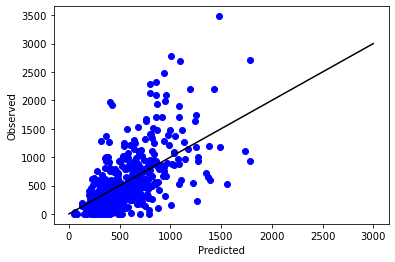

test data correlation coefficient is: 0.6076150219643565
train data correlation coefficient is: 0.9646682937358243


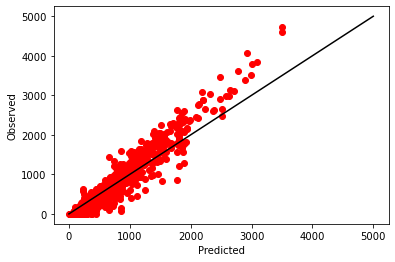

In [123]:
##Machine learning
from sklearn.model_selection import train_test_split
from numpy import loadtxt
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import accuracy_score
from sklearn import metrics

xargs=df1[
    [
        'Elevation', 'tmax', 'tmin', 'ndvi_augoct',
        'savi_augoct','wdrvi5_augoct','nd_r_g_augoct','nd_g_b_augoct','nd_swir2_nir_augoct', 'nd_swir2_r_augoct','ndvi_sepoct',
        'savi_sepoct','wdrvi5_sepoct','nd_r_g_sepoct','nd_g_b_sepoct','nd_swir2_nir_sepoct', 'nd_swir2_r_sepoct','ndvi_yr',
        'savi_yr','wdrvi5_yr','nd_r_g_yr','nd_g_b_yr','nd_swir2_nir_yr', 'nd_swir2_r_yr','ndvi_mayoct',
        'savi_mayoct','wdrvi5_mayoct','nd_r_g_mayoct','nd_g_b_mayoct','nd_swir2_nir_mayoct', 'nd_swir2_r_mayoct',
        'vp', 'srad', 'prcp', 'ndvi_min', 'ndvi_max'
    ]
]
#removed: 'nd_r_g','dayl','sn_prcp', 'sn_dayl', 'sn_srad', 'sn_vp', 'vp', 'srad', 'prcp'
##DOY!!!

# ##Include lag variables (e.g. lag ndvi), precip, temp, more

yargs=df1['liveMass'] 

size_x = 0.2
seed = 1
xargs_train, xargs_test, yargs_train, yargs_test = train_test_split(xargs, yargs, test_size=size_x, random_state = seed) 
## 80% training and 20% test

# Pipeline example:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
pipe = Pipeline([('scaler', StandardScaler()), ('forest', RandomForestRegressor(n_estimators=100, random_state=seed))])
pipe.fit(xargs_train, yargs_train)
pred=pipe.predict(xargs_test)
print('Mean Absolute Error:', metrics.mean_absolute_error(yargs_test, pred))
print('Mean Squared Error:', metrics.mean_squared_error(yargs_test, pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(yargs_test, pred)))
r_square = metrics.r2_score(yargs_test, pred)
print("The r squared is: " + str(r_square))
print(r_square)
print('testing r2 is: ' + str(pipe.score(xargs_test, yargs_test)))
print('training r2 is: ' + str(pipe.score(xargs_train, yargs_train)))
print('NRMSE is: ' + str(np.sqrt(metrics.mean_squared_error(yargs_test, pred))/np.ptp(yargs_test)))

# Mean
print('MEAN BASELINE:')
pred_mean = [np.mean(yargs_train)] * len(yargs_test)
print('Mean Absolute Error:', metrics.mean_absolute_error(yargs_test, pred_mean))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(yargs_test,pred_mean)))

plt.scatter(pred, yargs_test, color = 'blue') ##label axes - x,y in order?
# plt.plot(X_val, regressor.predict(X_val), color = 'red')
plt.xlabel("Predicted")
plt.ylabel("Observed")
plt.plot([0, 3000], [0, 3000], 'k-')
plt.show()

print('test data correlation coefficient is: ' + str(np.corrcoef(yargs_test, pred)[0, 1]))

train_pred = pipe.predict(xargs_train) ##Not sure if this is the right thing to do here
plt.scatter(train_pred, yargs_train, color = 'red')
plt.xlabel("Predicted")
plt.ylabel("Observed")
plt.plot([0, 5000], [0, 5000], 'k-')
plt.show

print('train data correlation coefficient is: ' + str(np.corrcoef(train_pred, yargs_train)[0, 1]))

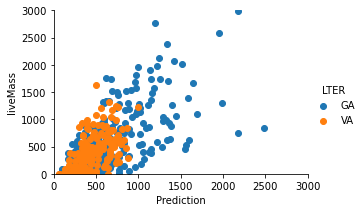

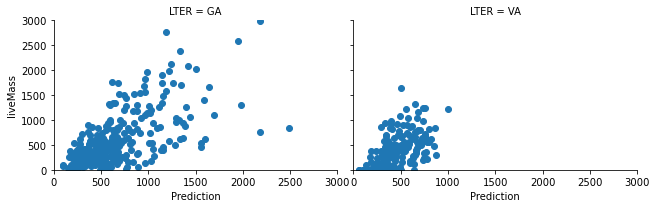

In [62]:
##Showing predicted vs. observed at each LTER site

import seaborn as sns

xxx = pd.DataFrame(data = [pred, yargs_test]).T
xxx.columns = ['Prediction', 'liveMass']

y_hats = pipe.predict(xargs)
df1['Prediction'] = y_hats

yyy = pd.merge(df1, xxx, on = ['Prediction', 'liveMass'])

g = sns.FacetGrid(data=yyy, hue='LTER', aspect=1.5)
g.map(plt.scatter, 'Prediction', 'liveMass').add_legend()

g.set(xlim=(0, 3000))
g.set(ylim=(0, 3000))

g = sns.FacetGrid(data=yyy, col='LTER', aspect=1.5)
g.map(plt.scatter, 'Prediction', 'liveMass').add_legend()

g.set(xlim=(0, 3000))
g.set(ylim=(0, 3000))

In [17]:
##k-fold cross validation; random forest

predictors = df1[
    [
        'Elevation', 'tmax', 'tmin', 'ndvi_augoct',
        'savi_augoct','wdrvi5_augoct','nd_r_g_augoct','nd_g_b_augoct','nd_swir2_nir_augoct', 'nd_swir2_r_augoct','ndvi_sepoct',
        'savi_sepoct','wdrvi5_sepoct','nd_r_g_sepoct','nd_g_b_sepoct','nd_swir2_nir_sepoct', 'nd_swir2_r_sepoct','ndvi_yr',
        'savi_yr','wdrvi5_yr','nd_r_g_yr','nd_g_b_yr','nd_swir2_nir_yr', 'nd_swir2_r_yr', 'ndvi_mayoct',
        'savi_mayoct','wdrvi5_mayoct','nd_r_g_mayoct','nd_g_b_mayoct','nd_swir2_nir_mayoct', 'nd_swir2_r_mayoct',
        'ndvi_min', 'ndvi_max'
    ]
]

targets = df1['liveMass'] 

from sklearn import model_selection
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics
from sklearn.model_selection import KFold, cross_validate
from sklearn.datasets import load_boston

X, y = predictors, targets
n_splits = 5
kf = KFold(n_splits=n_splits, shuffle=True)

model = pipe
scoring=('r2', 'neg_root_mean_squared_error')

cv_results = cross_validate(model, X, y, cv=kf, scoring=scoring, return_train_score=False)
cv_results

{'fit_time': array([3.02562475, 3.28935242, 3.12444282, 3.10868812, 3.06183386]),
 'score_time': array([0.01560879, 0.01595759, 0.01561046, 0.        , 0.01560664]),
 'test_r2': array([0.36539368, 0.32312823, 0.38600394, 0.36814982, 0.25937342]),
 'test_neg_root_mean_squared_error': array([-465.5314162 , -434.3211291 , -410.01186483, -418.67946171,
        -424.53038571])}

In [18]:
#Feature importance
pipe.steps[1][1].feature_importances_

array([0.12611866, 0.04822186, 0.02630916, 0.00925831, 0.01468198,
       0.00922018, 0.02324003, 0.02504219, 0.06482129, 0.01948201,
       0.00876349, 0.01839044, 0.01040184, 0.02768762, 0.02019335,
       0.0278115 , 0.01757954, 0.01020281, 0.02995961, 0.01368598,
       0.0422673 , 0.02552797, 0.04422141, 0.02774546, 0.00832992,
       0.02347051, 0.00857748, 0.02780526, 0.0279806 , 0.05107052,
       0.01250504, 0.03724763, 0.02689848, 0.03839966, 0.02121105,
       0.02566987])

In [89]:
#Elevation is very important

# xargs=df1[
#     [
#         'Elevation', 'tmax', 'nd_swir2_nir_augoct', 'nd_r_g_yr','nd_swir2_nir_yr', 'ndvi_min', 'ndvi_max'
#     ]
# ]

xargs=df1[
    [
        'Elevation', 'tmax', 'tmin', 'ndvi_augoct',
        'savi_augoct','nd_r_g_augoct','nd_g_b_augoct','nd_swir2_nir_augoct', 'nd_swir2_r_augoct','ndvi_yr',
        'savi_yr','wdrvi5_yr','nd_r_g_yr','nd_g_b_yr','nd_swir2_nir_yr', 'nd_swir2_r_yr',
        'savi_mayoct','nd_r_g_mayoct','nd_g_b_mayoct','nd_swir2_nir_mayoct', 'nd_swir2_r_mayoct',
        'vp', 'srad', 'prcp', 'ndvi_min', 'ndvi_max'
    ]
]

yargs=df1['liveMass'] 